In [1]:
abstract type cme257matrix end

In [2]:
struct cme257rank1{T} <: cme257matrix
    ## a rank-1 matrix type
    # A = u*v'
    # m is size of matrix
    u::Array{T, 1}
    v::Array{T, 1}
    m::Int64
end

function cme257rank1(u::Array{T, 1}, v::Array{T, 1}) where {T}
    # a special constructor for cme257rank1
    @assert length(u) == length(v) # we're only dealing with square matrices
    return cme257rank1(u, v, length(u))
end

import Base.*
using LinearAlgebra
function *(A::cme257rank1{T}, v::Array{T,1}) where {T}
    @assert A.m == length(v) # make sure vector is right size for matrix
    c = dot(A.v, v)
    return copy(A.u) * c
end

* (generic function with 355 methods)

In [13]:
u = [1.;2.;3.;4.;5.]
v = [1.;0.;1.;0.;1.]
@show M = cme257rank1(u,v)
@show M*u
@show M*randn(5)
@show M*ones(5)
;

M = cme257rank1(u, v) = cme257rank1{Float64}([1.0, 2.0, 3.0, 4.0, 5.0], [1.0, 0.0, 1.0, 0.0, 1.0], 5)
M * u = [9.0, 18.0, 27.0, 36.0, 45.0]
M * randn(5) = [2.571825527259092, 5.143651054518184, 7.715476581777276, 10.287302109036368, 12.85912763629546]
M * ones(5) = [3.0, 6.0, 9.0, 12.0, 15.0]


In [17]:
struct cme257diagonal{T} <: cme257matrix
    d::Array{T,1}
    m::Int64
end

function cme257diagonal(u::Array{T, 1}) where {T}
    return cme257diagonal(u, length(u))
end

import Base.*
using LinearAlgebra
function *(A::cme257diagonal, v::Array{T,1}) where {T}
    @assert A.m == length(v)
    return (A.d).*v
end

M = cme257diagonal([1;2;3])
@show M*ones(3)
@show M*[4;5;6]
;

M * ones(3) = [1.0, 2.0, 3.0]
M * [4; 5; 6] = [4, 10, 18]


In [42]:
using Pkg
Pkg.add("PyPlot")
using PyPlot;

 Resolving package versions...
  Updating `~/.julia/environments/v1.2/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.2/Manifest.toml`
 [no changes]


In [28]:
t_special = zeros(Float64,5)
t_standard = zeros(Float64,5)

for (i,size) in enumerate([10,50,100,500,1000])
    M = cme257diagonal(randn(size))
    v = randn(size)
    
    t0 = time()
    M*v
    t_special[i] = time() - t0
    
    M = randn((size,size))
    t0 = time()
    M*v
    t_standard[i] = time() - t0
end

@show t_special
@show t_standard
;

t_special = [3.0994415283203125e-6, 0.0, 1.1920928955078125e-6, 1.1920928955078125e-6, 3.0994415283203125e-6]
t_standard = [3.0994415283203125e-6, 1.9073486328125e-6, 4.696846008300781e-5, 0.0002658367156982422, 0.000431060791015625]


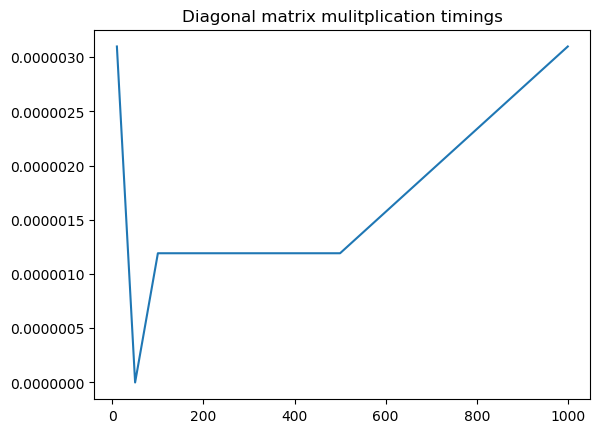

In [43]:
plot([10,50,100,500,1000],t_special)
title("Diagonal matrix mulitplication timings");

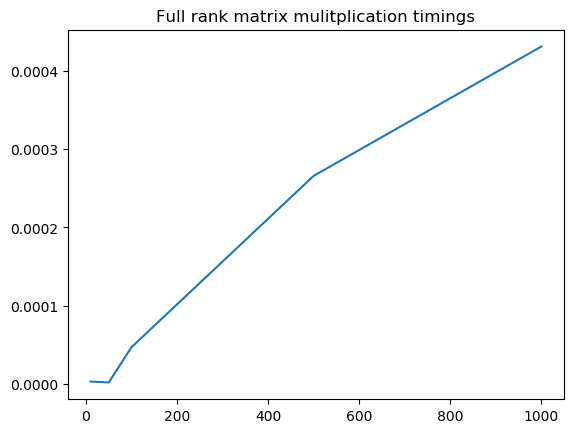

In [40]:
plot([10,50,100,500,1000],t_standard)
title("Full rank matrix mulitplication timings");

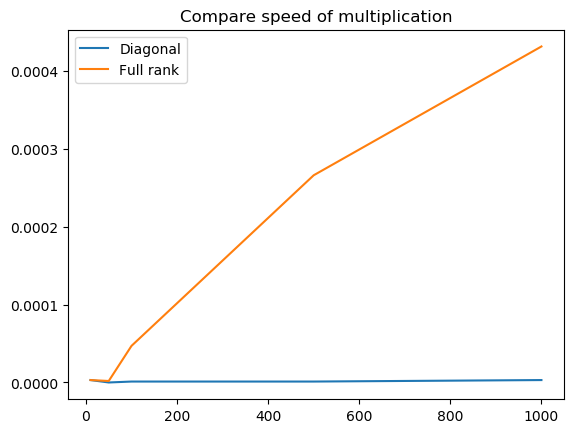

In [41]:
plot([10,50,100,500,1000],t_special,label="Diagonal")
plot([10,50,100,500,1000],t_standard,label="Full rank")
legend()
title("Compare speed of multiplication");